In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from joblib import load

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
base_coletada = pd.read_csv('dados\\resultados\\base_coletada_processada.csv')
base_coletada = base_coletada.fillna('')

## Classificando os modelos
Primeiro eles são carregados, juntamente com as features utilizada em seus treinos

Depois a base a ser classificada é carregada também, e com as features carregada na célula anterior, é criada uma matriz

E por fim é feita a classificação

In [3]:
naive_bayes = load('naive_bayes.joblib')
logistic_regression = load('logistic_regression.joblib')
linear_SVM = load('linear_SVM.joblib')
random_forest = load('random_forest.joblib')

In [4]:
tfidf_transformer = load('vectorizer.joblib')

base_coletada = pd.read_csv('dados\\resultados\\base_coletada_processada.csv')
base_coletada = base_coletada.fillna('')

X_tfidf = tfidf_transformer.transform(base_coletada['Texto Processado'])

In [5]:
y_previsto_MNR =  naive_bayes.predict(X_tfidf)
y_previsto_LR = logistic_regression.predict(X_tfidf)
y_previsto_LSVM = linear_SVM.predict(X_tfidf)
y_previsto_RF = random_forest.predict(X_tfidf)

## Novo dataframe incluindo o resultado de cada classificação

In [6]:
resultado_classificacao = pd.DataFrame(data={"Mes": base_coletada["mes"], "Texto" : base_coletada["text"], "Texto_Processado" : base_coletada['Texto Processado'], "Naive_Bayes" : y_previsto_MNR, "Logistic_Regression" : y_previsto_LR, "SVM" : y_previsto_LSVM, "Random_Forest" : y_previsto_RF})

In [7]:
resultado_classificacao.head()

,Mes,Texto,Texto_Processado,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
0,Janeiro,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...,Positivo,Positivo,Positivo,Positivo
1,Janeiro,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso,Negativo,Neutro,Neutro,Neutro
2,Janeiro,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre,Neutro,Neutro,Neutro,Neutro
3,Janeiro,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...,Negativo,Negativo,Negativo,Negativo
4,Janeiro,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...,Positivo,Positivo,Positivo,Neutro


In [8]:
resultado_classificacao.to_csv('dados\\resultados\\coletada_processada_classificada.csv', index=False)

## Contagem de classes para cada algoritmo

In [9]:
resultado_classificacao['Naive_Bayes'].value_counts()

Positivo    409855
Neutro      358335
Negativo    212387
Name: Naive_Bayes, dtype: int64

In [10]:
resultado_classificacao['Logistic_Regression'].value_counts()

Neutro      724700
Positivo    209452
Negativo     46425
Name: Logistic_Regression, dtype: int64

In [11]:
resultado_classificacao["SVM"].value_counts()

Neutro      704255
Positivo    222860
Negativo     53462
Name: SVM, dtype: int64

In [12]:
resultado_classificacao["Random_Forest"].value_counts()

Neutro      842722
Positivo     69066
Negativo     68789
Name: Random_Forest, dtype: int64

# Tabelas com a classe pelo mês 

In [13]:
#Função para auxiliar a consulta na base de dados classificada
def _quantidadeClasses(mes, algoritmo):
    positivos = (resultado_classificacao.query("Mes == '"+mes+"' and "+algoritmo+" == 'Positivo'"))[algoritmo].count()
    negativos = (resultado_classificacao.query("Mes == '"+mes+"' and  "+algoritmo+"== 'Negativo'"))[algoritmo].count()
    neutros = (resultado_classificacao.query("Mes == '"+mes+"' and "+algoritmo+" == 'Neutro'"))[algoritmo].count()
    
    return positivos, negativos, neutros

Tabela MultinomialNB

In [14]:
MultinomialNB = pd.DataFrame([ _quantidadeClasses('Janeiro', 'Naive_Bayes')], index=["Janeiro"], columns=["Positivo", "Negativo", "Neutro"])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Fevereiro', 'Naive_Bayes')], index=["Fevereiro"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Marco', 'Naive_Bayes')], index=["Março"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Abril', 'Naive_Bayes')], index=["Abril"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Maio', 'Naive_Bayes')], index=["Maio"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Junho', 'Naive_Bayes')], index=["Junho"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Julho', 'Naive_Bayes')], index=["Julho"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Agosto', 'Naive_Bayes')], index=["Agosto"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Setembro', 'Naive_Bayes')], index=["Setembro"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Outubro', 'Naive_Bayes')], index=["Outubro"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB = pd.concat([MultinomialNB, pd.DataFrame([ _quantidadeClasses('Novembro', 'Naive_Bayes')], index=["Novembro"], columns=["Positivo", "Negativo", "Neutro"])])
MultinomialNB

,Positivo,Negativo,Neutro
Janeiro,13942,5180,10594
Fevereiro,43479,21083,40013
Março,66616,31014,50471
Abril,54775,29773,50168
Maio,64925,31758,49679
Junho,42337,18447,43231
Julho,57968,32676,50411
Agosto,15464,9671,15864
Setembro,17950,12309,16112
Outubro,24940,16293,23969


Gráfico com a quantidade total de classes pelo Naive Bayes

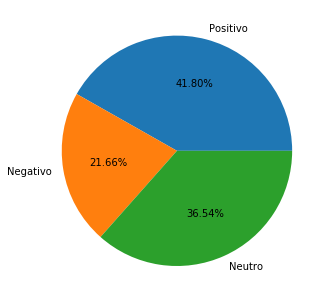

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Positivo', 'Negativo', 'Neutro']
algoritmo = [MultinomialNB["Positivo"].sum(), MultinomialNB["Negativo"].sum(), MultinomialNB["Neutro"].sum()]
ax.pie(algoritmo, labels=classes, autopct='%1.2f%%')
plt.show()

Tabela Logistic Regression

In [16]:
Logistic_Regression = pd.DataFrame([ _quantidadeClasses('Janeiro', 'Logistic_Regression')], index=["Janeiro"], columns=["Positivo", "Negativo", "Neutro"])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Fevereiro', 'Logistic_Regression')], index=["Fevereiro"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Marco', 'Logistic_Regression')], index=["Março"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Abril', 'Logistic_Regression')], index=["Abril"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Maio', 'Logistic_Regression')], index=["Maio"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Junho', 'Logistic_Regression')], index=["Junho"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Julho', 'Logistic_Regression')], index=["Julho"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Agosto', 'Logistic_Regression')], index=["Agosto"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Setembro', 'Logistic_Regression')], index=["Setembro"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Outubro', 'Logistic_Regression')], index=["Outubro"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression = pd.concat([Logistic_Regression, pd.DataFrame([ _quantidadeClasses('Novembro', 'Logistic_Regression')], index=["Novembro"], columns=["Positivo", "Negativo", "Neutro"])])
Logistic_Regression

,Positivo,Negativo,Neutro
Janeiro,7070,978,21668
Fevereiro,20903,4382,79290
Março,34876,6425,106800
Abril,26272,6770,101674
Maio,37052,7051,102259
Junho,20110,3995,79910
Julho,30825,7419,102811
Agosto,8481,2043,30475
Setembro,7976,2855,35540
Outubro,12046,3561,49595


Gráfico com a quantidade total de cada classe pelo Regressão Logística

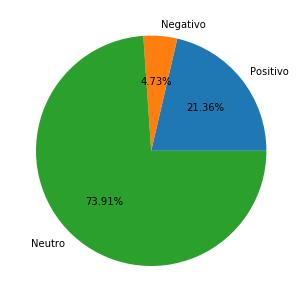

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Positivo', 'Negativo', 'Neutro']
algoritmo = [Logistic_Regression["Positivo"].sum(), Logistic_Regression["Negativo"].sum(), Logistic_Regression["Neutro"].sum()]
ax.pie(algoritmo, labels=classes, autopct='%1.2f%%')
plt.show()

Tabela do SVM

In [18]:
SVM = pd.DataFrame([ _quantidadeClasses('Janeiro', 'SVM')], index=["Janeiro"], columns=["Positivo", "Negativo", "Neutro"])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Fevereiro', 'SVM')], index=["Fevereiro"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Marco', 'SVM')], index=["Março"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Abril', 'SVM')], index=["Abril"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Maio', 'SVM')], index=["Maio"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Junho', 'SVM')], index=["Junho"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Julho', 'SVM')], index=["Julho"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Agosto', 'SVM')], index=["Agosto"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Setembro', 'SVM')], index=["Setembro"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Outubro', 'SVM')], index=["Outubro"], columns=["Positivo", "Negativo", "Neutro"])])
SVM = pd.concat([SVM, pd.DataFrame([ _quantidadeClasses('Novembro', 'SVM')], index=["Novembro"], columns=["Positivo", "Negativo", "Neutro"])])
SVM

,Positivo,Negativo,Neutro
Janeiro,7891,1142,20683
Fevereiro,22760,5075,76740
Março,37098,7496,103507
Abril,28050,7656,99010
Maio,38984,7973,99405
Junho,20856,4725,78434
Julho,32506,8594,99955
Agosto,9078,2337,29584
Setembro,8579,3399,34393
Outubro,12718,3919,48565


Gráfico com a quantidade em cada classe pelo SVM

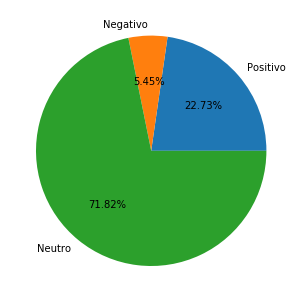

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Positivo', 'Negativo', 'Neutro']
algoritmo = [SVM["Positivo"].sum(), SVM["Negativo"].sum(), SVM["Neutro"].sum()]
ax.pie(algoritmo, labels=classes, autopct='%1.2f%%')
plt.show()

Tabela de mês por classe do Florestas Aleatória

In [20]:
Random_Forest = pd.DataFrame([ _quantidadeClasses('Janeiro', 'Random_Forest')], index=["Janeiro"], columns=["Positivo", "Negativo", "Neutro"])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Fevereiro', 'Random_Forest')], index=["Fevereiro"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Marco', 'Random_Forest')], index=["Março"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Abril', 'Random_Forest')], index=["Abril"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Maio', 'Random_Forest')], index=["Maio"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Junho', 'Random_Forest')], index=["Junho"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Julho', 'Random_Forest')], index=["Julho"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Agosto', 'Random_Forest')], index=["Agosto"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Setembro', 'Random_Forest')], index=["Setembro"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Outubro', 'Random_Forest')], index=["Outubro"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest = pd.concat([Random_Forest, pd.DataFrame([ _quantidadeClasses('Novembro', 'Random_Forest')], index=["Novembro"], columns=["Positivo", "Negativo", "Neutro"])])
Random_Forest

,Positivo,Negativo,Neutro
Janeiro,2347,1627,25742
Fevereiro,6978,6509,91088
Março,10942,10773,126386
Abril,8545,9064,117107
Maio,12254,10422,123686
Junho,6742,5596,91677
Julho,10253,11061,119741
Agosto,2757,3211,35031
Setembro,2726,3595,40050
Outubro,4163,5428,55611


Gráfico com a quantidade total de cada classe pelo Floresta Aleatória

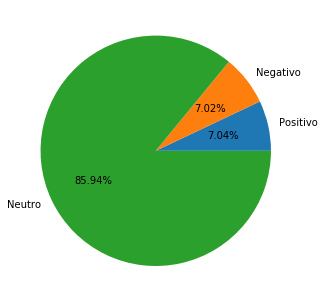

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Positivo', 'Negativo', 'Neutro']
algoritmo = [Random_Forest["Positivo"].sum(), Random_Forest["Negativo"].sum(), Random_Forest["Neutro"].sum()]
ax.pie(algoritmo, labels=classes, autopct='%1.2f%%')
plt.show()

# Gráficos da quantidade de tweets pelo mês para cada classe

Naive Bayes

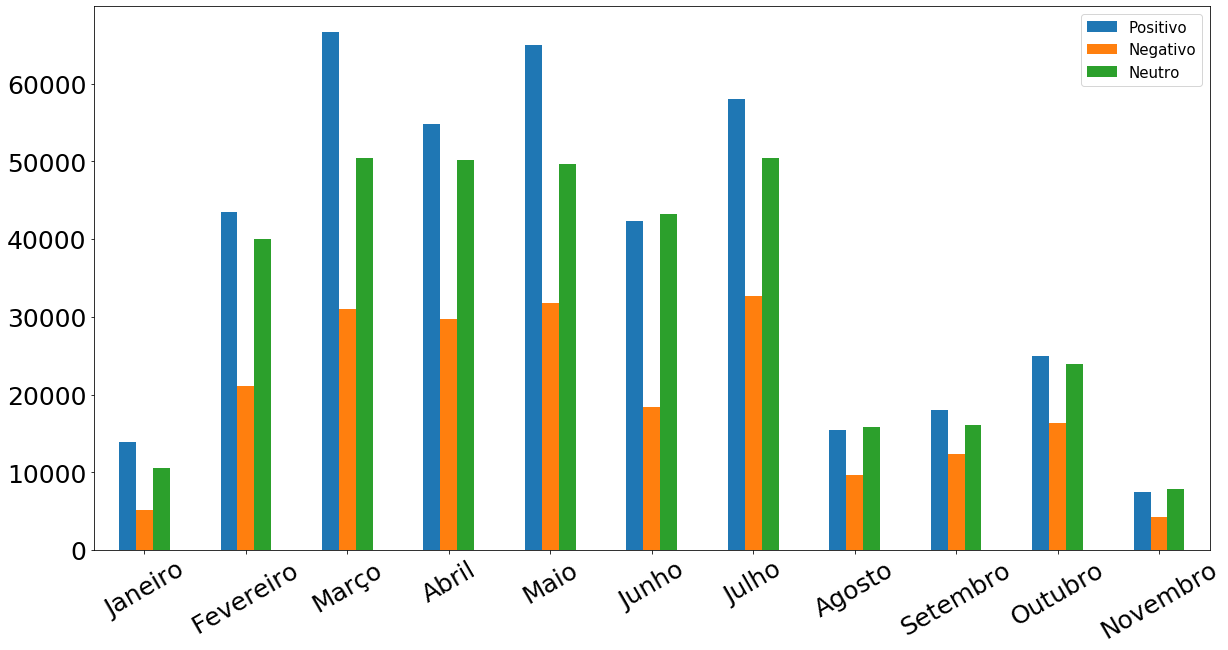

In [22]:
ax = MultinomialNB.plot.bar(rot=0, figsize=(20, 10), fontsize=25)
plt.xticks(rotation=30)
ax.legend(bbox_to_anchor=(1,1), loc=0, fontsize=15)

Regressão Logística

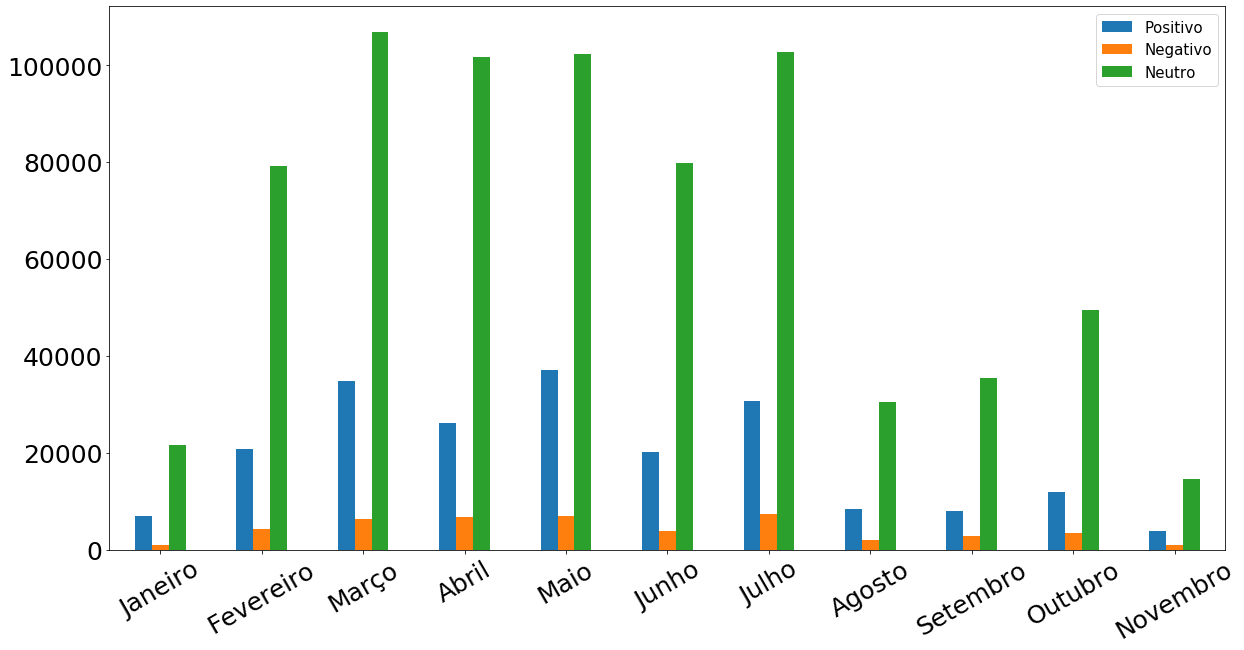

In [23]:
ax = Logistic_Regression.plot.bar(rot=0, figsize=(20, 10), fontsize=25)
plt.xticks(rotation=30)
ax.legend(bbox_to_anchor=(1,1), loc=0, fontsize=15)

SVM

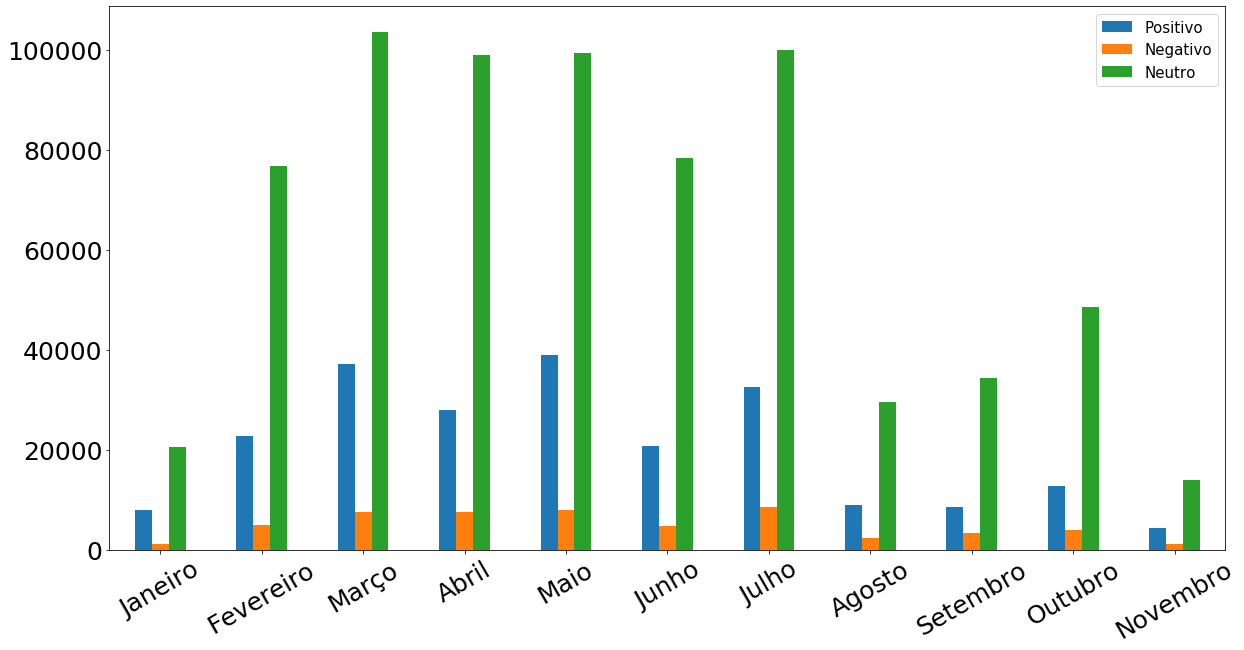

In [24]:
ax = SVM.plot.bar(rot=0, figsize=(20, 10), fontsize=25)
plt.xticks(rotation=30)
ax.legend(bbox_to_anchor=(1,1), loc=0, fontsize=15)

Random Forest

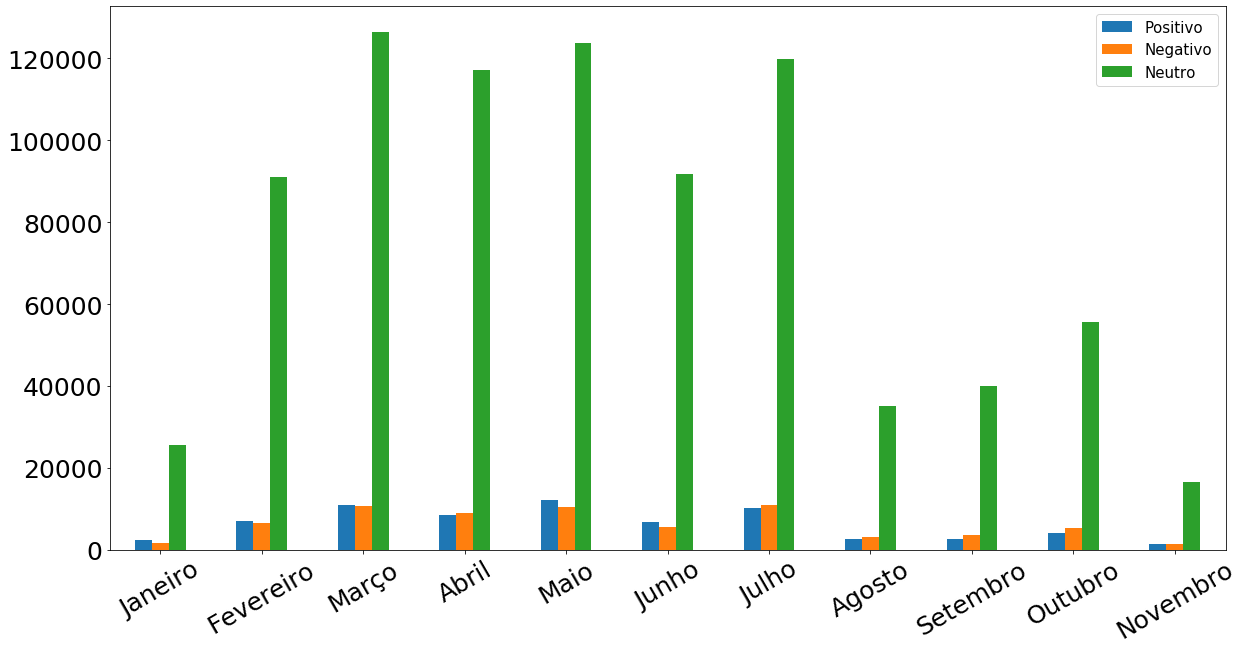

In [25]:
ax = Random_Forest.plot.bar(rot=0, figsize=(20, 10), fontsize=25)
plt.xticks(rotation=30)
ax.legend(bbox_to_anchor=(1,1), loc=0, fontsize=15)

# Comparação entre as classificações de cada algoritimo 

In [26]:
MNB_LR = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

In [27]:
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,NaN,NaN,NaN,NaN
Negativo,NaN,NaN,NaN,NaN
Neutro,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN


In [28]:
resultado_classificacao.query('Naive_Bayes == Logistic_Regression')['Naive_Bayes'].value_counts()

Neutro      346160
Positivo    160291
Negativo     42554
Name: Naive_Bayes, dtype: int64

In [29]:
neutros, positivos, negativos = resultado_classificacao.query('Naive_Bayes == Logistic_Regression')['Naive_Bayes'].value_counts()

In [30]:
MNB_LR.loc["Positivo"]["Positivo"] = positivos
MNB_LR.loc["Negativo"]["Negativo"] = negativos
MNB_LR.loc["Neutro"]["Neutro"] = neutros

In [31]:
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,NaN,NaN,NaN
Negativo,NaN,42554,NaN,NaN
Neutro,NaN,NaN,346160,NaN
Total,NaN,NaN,NaN,NaN


In [32]:
resultado_classificacao.query('Naive_Bayes != Logistic_Regression')['Naive_Bayes'].value_counts()

Positivo    249564
Negativo    169833
Neutro       12175
Name: Naive_Bayes, dtype: int64

In [33]:
resultado_classificacao.query('Naive_Bayes != Logistic_Regression')['Logistic_Regression'].value_counts()

Neutro      378540
Positivo     49161
Negativo      3871
Name: Logistic_Regression, dtype: int64

In [34]:
resultado_classificacao.query('Naive_Bayes == "Negativo" and Logistic_Regression == "Positivo"')['Naive_Bayes'].value_counts()

Negativo    38175
Name: Naive_Bayes, dtype: int64

In [35]:
MNB_LR.loc["Negativo"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and Logistic_Regression == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,NaN,NaN,NaN
Negativo,38175,42554,NaN,NaN
Neutro,NaN,NaN,346160,NaN
Total,NaN,NaN,NaN,NaN


In [36]:
MNB_LR.loc["Neutro"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and Logistic_Regression == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,NaN,NaN,NaN
Negativo,38175,42554,NaN,NaN
Neutro,10986,NaN,346160,NaN
Total,NaN,NaN,NaN,NaN


In [37]:
MNB_LR.loc["Positivo"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and Logistic_Regression == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,2682,NaN,NaN
Negativo,38175,42554,NaN,NaN
Neutro,10986,NaN,346160,NaN
Total,NaN,NaN,NaN,NaN


In [38]:
MNB_LR.loc["Neutro"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and Logistic_Regression == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,2682,NaN,NaN
Negativo,38175,42554,NaN,NaN
Neutro,10986,1189,346160,NaN
Total,NaN,NaN,NaN,NaN


In [39]:
MNB_LR.loc["Positivo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and Logistic_Regression == "Neutro"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,2682,246882,NaN
Negativo,38175,42554,NaN,NaN
Neutro,10986,1189,346160,NaN
Total,NaN,NaN,NaN,NaN


In [40]:
MNB_LR.loc["Negativo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and Logistic_Regression == "Neutro"')['Naive_Bayes'].value_counts()[0]
MNB_LR

,Positivo,Negativo,Neutro,Total
Positivo,160291,2682,246882,NaN
Negativo,38175,42554,131658,NaN
Neutro,10986,1189,346160,NaN
Total,NaN,NaN,NaN,NaN


In [41]:
MNB_LR.loc["Positivo"]["Total"] = MNB_LR.loc["Positivo"].sum()
MNB_LR.loc["Negativo"]["Total"] = MNB_LR.loc["Negativo"].sum()
MNB_LR.loc["Neutro"]["Total"] = MNB_LR.loc["Neutro"].sum()

MNB_LR.loc["Total"]["Positivo"] = MNB_LR["Positivo"].sum()
MNB_LR.loc["Total"]["Negativo"] = MNB_LR["Negativo"].sum()
MNB_LR.loc["Total"]["Neutro"] = MNB_LR["Neutro"].sum()

MNB_LR.loc["Total"]["Total"] = MNB_LR["Total"].sum()

# Naive Bayes x Regressão Logística

In [42]:
MNB_LR.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,160291,2682,246882,409855
Negativo,38175,42554,131658,212387
Neutro,10986,1189,346160,358335
Total,209452,46425,724700,980577


In [43]:
MNB_SVM = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

In [44]:
neutros, positivos, negativos = resultado_classificacao.query('Naive_Bayes == SVM')['Naive_Bayes'].value_counts()

MNB_SVM.loc["Positivo"]["Positivo"] = positivos
MNB_SVM.loc["Negativo"]["Negativo"] = negativos
MNB_SVM.loc["Neutro"]["Neutro"] = neutros

MNB_SVM

,Positivo,Negativo,Neutro,Total
Positivo,166287,NaN,NaN,NaN
Negativo,NaN,45149,NaN,NaN
Neutro,NaN,NaN,344354,NaN
Total,NaN,NaN,NaN,NaN


In [45]:
MNB_SVM.loc["Negativo"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and SVM == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_SVM.loc["Neutro"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and SVM == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_SVM.loc["Positivo"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and SVM == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_SVM.loc["Neutro"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and SVM == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_SVM.loc["Positivo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and SVM == "Neutro"')['Naive_Bayes'].value_counts()[0]
MNB_SVM.loc["Negativo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and SVM == "Neutro"')['Naive_Bayes'].value_counts()[0]

MNB_SVM.loc["Positivo"]["Total"] = MNB_SVM.loc["Positivo"].sum()
MNB_SVM.loc["Negativo"]["Total"] = MNB_SVM.loc["Negativo"].sum()
MNB_SVM.loc["Neutro"]["Total"] = MNB_SVM.loc["Neutro"].sum()

MNB_SVM.loc["Total"]["Positivo"] = MNB_SVM["Positivo"].sum()
MNB_SVM.loc["Total"]["Negativo"] = MNB_SVM["Negativo"].sum()
MNB_SVM.loc["Total"]["Neutro"] = MNB_SVM["Neutro"].sum()

MNB_SVM.loc["Total"]["Total"] = MNB_SVM["Total"].sum()

# Naive Bayes x SVM

In [46]:
MNB_SVM.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,166287,6648,236920,409855
Negativo,44257,45149,122981,212387
Neutro,12316,1665,344354,358335
Total,222860,53462,704255,980577


In [47]:
MNB_RF = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

neutros, positivos, negativos = resultado_classificacao.query('Naive_Bayes == Random_Forest')['Naive_Bayes'].value_counts()

MNB_RF.loc["Positivo"]["Positivo"] = positivos
MNB_RF.loc["Negativo"]["Negativo"] = negativos
MNB_RF.loc["Neutro"]["Neutro"] = neutros

In [48]:
MNB_RF.loc["Negativo"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and Random_Forest == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_RF.loc["Neutro"]["Positivo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and Random_Forest == "Positivo"')['Naive_Bayes'].value_counts()[0]
MNB_RF.loc["Positivo"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and Random_Forest == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_RF.loc["Neutro"]["Negativo"] = resultado_classificacao.query('Naive_Bayes == "Neutro" and Random_Forest == "Negativo"')['Naive_Bayes'].value_counts()[0]
MNB_RF.loc["Positivo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Positivo" and Random_Forest == "Neutro"')['Naive_Bayes'].value_counts()[0]
MNB_RF.loc["Negativo"]["Neutro"] = resultado_classificacao.query('Naive_Bayes == "Negativo" and Random_Forest == "Neutro"')['Naive_Bayes'].value_counts()[0]

MNB_RF.loc["Positivo"]["Total"] = MNB_RF.loc["Positivo"].sum()
MNB_RF.loc["Negativo"]["Total"] = MNB_RF.loc["Negativo"].sum()
MNB_RF.loc["Neutro"]["Total"] = MNB_RF.loc["Neutro"].sum()

MNB_RF.loc["Total"]["Positivo"] = MNB_RF["Positivo"].sum()
MNB_RF.loc["Total"]["Negativo"] = MNB_RF["Negativo"].sum()
MNB_RF.loc["Total"]["Neutro"] = MNB_RF["Neutro"].sum()

MNB_RF.loc["Total"]["Total"] = MNB_RF["Total"].sum()

# Naive Bayes x Random Forest

In [49]:
MNB_RF.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,51814,20386,337655,409855
Negativo,11665,45749,154973,212387
Neutro,5587,2654,350094,358335
Total,69066,68789,842722,980577


In [50]:
LR_SVM = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

neutros, positivos, negativos = resultado_classificacao.query('Logistic_Regression == SVM')['Logistic_Regression'].value_counts()

LR_SVM.loc["Positivo"]["Positivo"] = positivos
LR_SVM.loc["Negativo"]["Negativo"] = negativos
LR_SVM.loc["Neutro"]["Neutro"] = neutros

In [51]:
LR_SVM.loc["Negativo"]["Positivo"] = resultado_classificacao.query('Logistic_Regression == "Negativo" and SVM == "Positivo"')['Logistic_Regression'].value_counts()[0]
LR_SVM.loc["Neutro"]["Positivo"] = resultado_classificacao.query('Logistic_Regression == "Neutro" and SVM == "Positivo"')['Logistic_Regression'].value_counts()[0]
LR_SVM.loc["Positivo"]["Negativo"] = resultado_classificacao.query('Logistic_Regression == "Positivo" and SVM == "Negativo"')['Logistic_Regression'].value_counts()[0]
LR_SVM.loc["Neutro"]["Negativo"] = resultado_classificacao.query('Logistic_Regression == "Neutro" and SVM == "Negativo"')['Logistic_Regression'].value_counts()[0]
LR_SVM.loc["Positivo"]["Neutro"] = resultado_classificacao.query('Logistic_Regression == "Positivo" and SVM == "Neutro"')['Logistic_Regression'].value_counts()[0]
LR_SVM.loc["Negativo"]["Neutro"] = resultado_classificacao.query('Logistic_Regression == "Negativo" and SVM == "Neutro"')['Logistic_Regression'].value_counts()[0]

LR_SVM.loc["Positivo"]["Total"] = LR_SVM.loc["Positivo"].sum()
LR_SVM.loc["Negativo"]["Total"] = LR_SVM.loc["Negativo"].sum()
LR_SVM.loc["Neutro"]["Total"] = LR_SVM.loc["Neutro"].sum()

LR_SVM.loc["Total"]["Positivo"] = LR_SVM["Positivo"].sum()
LR_SVM.loc["Total"]["Negativo"] = LR_SVM["Negativo"].sum()
LR_SVM.loc["Total"]["Neutro"] = LR_SVM["Neutro"].sum()

LR_SVM.loc["Total"]["Total"] = LR_SVM["Total"].sum()

# Regressão Logística x SVM

In [52]:
LR_SVM.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,178959,7411,23082,209452
Negativo,6923,36547,2955,46425
Neutro,36978,9504,678218,724700
Total,222860,53462,704255,980577


In [53]:
LR_RF = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

neutros, positivos, negativos = resultado_classificacao.query('Logistic_Regression == Random_Forest')['Logistic_Regression'].value_counts()

LR_RF.loc["Positivo"]["Positivo"] = positivos
LR_RF.loc["Negativo"]["Negativo"] = negativos
LR_RF.loc["Neutro"]["Neutro"] = neutros

In [54]:
LR_RF.loc["Negativo"]["Positivo"] = resultado_classificacao.query('Logistic_Regression == "Negativo" and Random_Forest == "Positivo"')['Logistic_Regression'].value_counts()[0]
LR_RF.loc["Neutro"]["Positivo"] = resultado_classificacao.query('Logistic_Regression == "Neutro" and Random_Forest == "Positivo"')['Logistic_Regression'].value_counts()[0]
LR_RF.loc["Positivo"]["Negativo"] = resultado_classificacao.query('Logistic_Regression == "Positivo" and Random_Forest == "Negativo"')['Logistic_Regression'].value_counts()[0]
LR_RF.loc["Neutro"]["Negativo"] = resultado_classificacao.query('Logistic_Regression == "Neutro" and Random_Forest == "Negativo"')['Logistic_Regression'].value_counts()[0]
LR_RF.loc["Positivo"]["Neutro"] = resultado_classificacao.query('Logistic_Regression == "Positivo" and Random_Forest == "Neutro"')['Logistic_Regression'].value_counts()[0]
LR_RF.loc["Negativo"]["Neutro"] = resultado_classificacao.query('Logistic_Regression == "Negativo" and Random_Forest == "Neutro"')['Logistic_Regression'].value_counts()[0]

LR_RF.loc["Positivo"]["Total"] = LR_RF.loc["Positivo"].sum()
LR_RF.loc["Negativo"]["Total"] = LR_RF.loc["Negativo"].sum()
LR_RF.loc["Neutro"]["Total"] = LR_RF.loc["Neutro"].sum()

LR_RF.loc["Total"]["Positivo"] = LR_RF["Positivo"].sum()
LR_RF.loc["Total"]["Negativo"] = LR_RF["Negativo"].sum()
LR_RF.loc["Total"]["Neutro"] = LR_RF["Neutro"].sum()

LR_RF.loc["Total"]["Total"] = LR_RF["Total"].sum()

# Regressão Logística x Random Forest

In [55]:
LR_RF.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,58823,26811,123818,209452
Negativo,2966,27526,15933,46425
Neutro,7277,14452,702971,724700
Total,69066,68789,842722,980577


In [56]:
SVM_RF = pd.DataFrame( index=["Positivo", "Negativo", "Neutro", "Total"], columns=["Positivo", "Negativo", "Neutro", "Total"])

neutros, positivos, negativos = resultado_classificacao.query('SVM == Random_Forest')['SVM'].value_counts()

SVM_RF.loc["Positivo"]["Positivo"] = positivos
SVM_RF.loc["Negativo"]["Negativo"] = negativos
SVM_RF.loc["Neutro"]["Neutro"] = neutros

In [57]:
SVM_RF.loc["Negativo"]["Positivo"] = resultado_classificacao.query('SVM == "Negativo" and Random_Forest == "Positivo"')['SVM'].value_counts()[0]
SVM_RF.loc["Neutro"]["Positivo"] = resultado_classificacao.query('SVM == "Neutro" and Random_Forest == "Positivo"')['SVM'].value_counts()[0]
SVM_RF.loc["Positivo"]["Negativo"] = resultado_classificacao.query('SVM == "Positivo" and Random_Forest == "Negativo"')['SVM'].value_counts()[0]
SVM_RF.loc["Neutro"]["Negativo"] = resultado_classificacao.query('SVM == "Neutro" and Random_Forest == "Negativo"')['SVM'].value_counts()[0]
SVM_RF.loc["Positivo"]["Neutro"] = resultado_classificacao.query('SVM == "Positivo" and Random_Forest == "Neutro"')['SVM'].value_counts()[0]
SVM_RF.loc["Negativo"]["Neutro"] = resultado_classificacao.query('SVM == "Negativo" and Random_Forest == "Neutro"')['SVM'].value_counts()[0]

SVM_RF.loc["Positivo"]["Total"] = SVM_RF.loc["Positivo"].sum()
SVM_RF.loc["Negativo"]["Total"] = SVM_RF.loc["Negativo"].sum()
SVM_RF.loc["Neutro"]["Total"] = SVM_RF.loc["Neutro"].sum()

SVM_RF.loc["Total"]["Positivo"] = SVM_RF["Positivo"].sum()
SVM_RF.loc["Total"]["Negativo"] = SVM_RF["Negativo"].sum()
SVM_RF.loc["Total"]["Neutro"] = SVM_RF["Neutro"].sum()

SVM_RF.loc["Total"]["Total"] = SVM_RF["Total"].sum()

# SVM x Random Forest

In [58]:
SVM_RF.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "150%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "150%"), ("text-align", "center")]},
])

,Positivo,Negativo,Neutro,Total
Positivo,56341,29348,137171,222860
Negativo,3299,26612,23551,53462
Neutro,9426,12829,682000,704255
Total,69066,68789,842722,980577
